In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ELCOT\Downloads\Employee.csv")

In [3]:
#Using groupby condition, visualize the total number of male and female candidates who completed their education in bachelor, master, etc.

In [5]:
grp = df.groupby(["Gender", "Education"]).size().unstack()

In [6]:
grp

Education,Bachelors,Masters,PHD
Gender,,,
Female,1435,371,69
Male,2166,502,110


In [7]:
grp1 = df.groupby(["Gender", "Education"]).size()

In [8]:
grp1

Gender  Education
Female  Bachelors    1435
        Masters       371
        PHD            69
Male    Bachelors    2166
        Masters       502
        PHD           110
dtype: int64

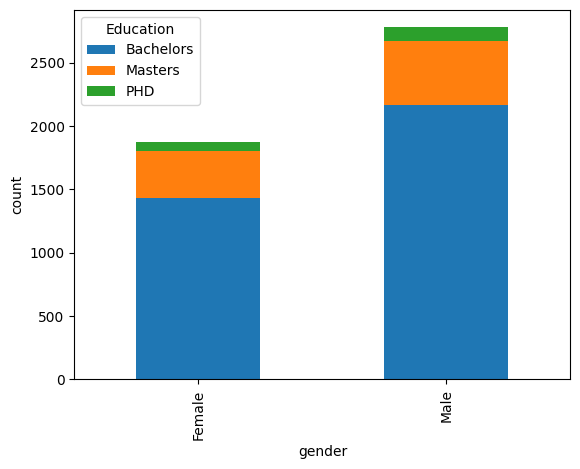

In [9]:
grp.plot(kind = "bar", stacked = True)
plt.xlabel("gender")
plt.ylabel("count")
plt.show()


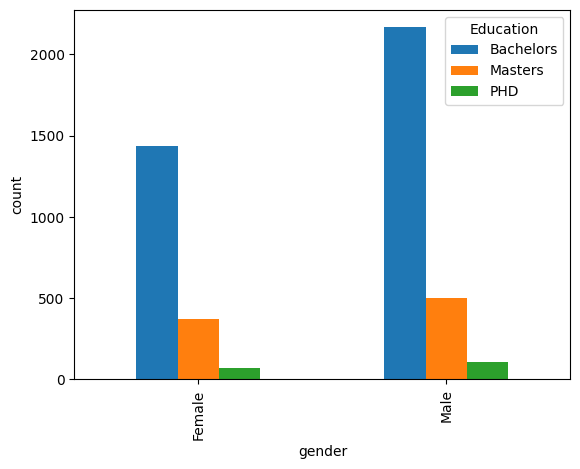

In [10]:
grp.plot(kind = "bar", stacked = False)
plt.xlabel("gender")
plt.ylabel("count")
plt.show()


In [11]:
#create a table to visualize the education with years of experience sum of the candidates.

In [12]:
group = df.groupby("Education")["ExperienceInCurrentDomain"].sum().reset_index()

In [13]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [14]:
group

,Education,ExperienceInCurrentDomain
0,Bachelors,10481
1,Masters,2518
2,PHD,521


In [15]:
grou = df.groupby("Gender")["Education"].sum()

In [16]:
grou

Gender
Female    BachelorsBachelorsBachelorsBachelorsBachelorsB...
Male      BachelorsMastersMastersBachelorsBachelorsBache...
Name: Education, dtype: object

In [17]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [18]:
gr = df.groupby("Gender")["Education"].size()

In [19]:
gr

Gender
Female    1875
Male      2778
Name: Education, dtype: int64

Text(0.5, 1.0, 'sum experiene by education level')

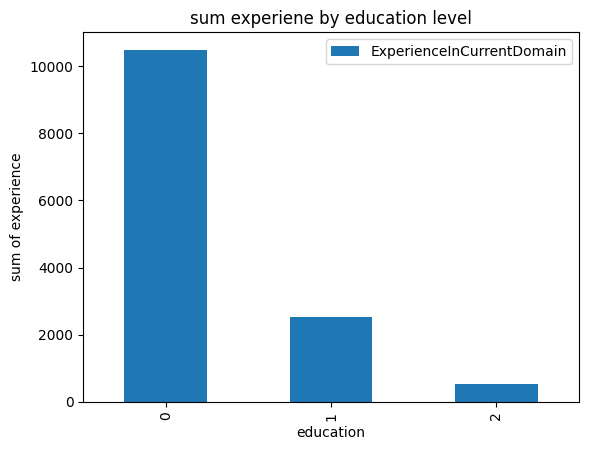

In [20]:
group.plot(kind = "bar", stacked = False)
plt.xlabel("education")
plt.ylabel("sum of experience")
plt.title("sum experiene by education level")

In [21]:
#observation
#Male 2778 *Female 1875
#Bachelors 3601  * Masters 873 * PHD 179
#40% female candidates working  #59% male candidates working
# 26 to 30 age group most working
#bachelors has highest experience 

In [22]:
join=df["JoiningYear"].value_counts().sort_values()

In [23]:
join

JoiningYear
2018     367
2012     504
2016     525
2013     669
2014     699
2015     781
2017    1108
Name: count, dtype: int64

<Axes: xlabel='JoiningYear'>

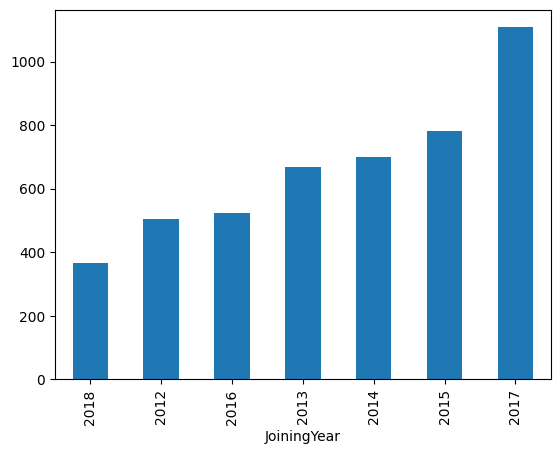

In [24]:
join.plot(kind = "bar", stacked = False)

In [25]:
city = df["City"].value_counts().sort_values()

In [26]:
city

City
New Delhi    1157
Pune         1268
Bangalore    2228
Name: count, dtype: int64

<Axes: xlabel='City'>

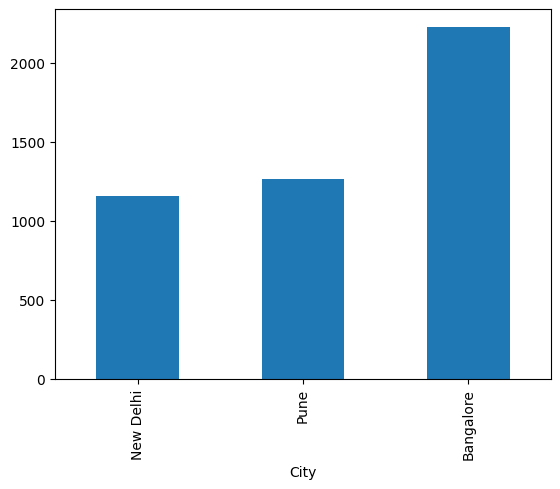

In [27]:
city.plot(kind = "bar", stacked = False)

In [28]:
Leave = df["LeaveOrNot"].value_counts()

In [29]:
Leave

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

<Axes: xlabel='LeaveOrNot'>

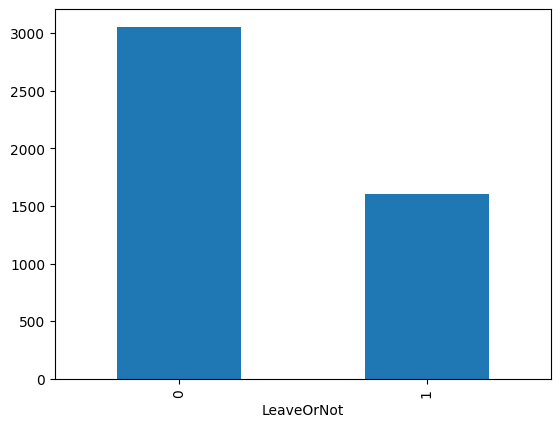

In [30]:
Leave.plot(kind = "bar",stacked = False)

In [31]:
# LeaveOrNot most of the working candiates does not take leave
# most working candidates working in bangalore then pune, finally new delhi
#most of the employess joined in 2017
# male has taken leave by EverBenched

In [32]:
gl=df.groupby(["Gender"])["LeaveOrNot"].sum()

In [33]:
gl

Gender
Female    884
Male      716
Name: LeaveOrNot, dtype: int64

<Axes: xlabel='Gender'>

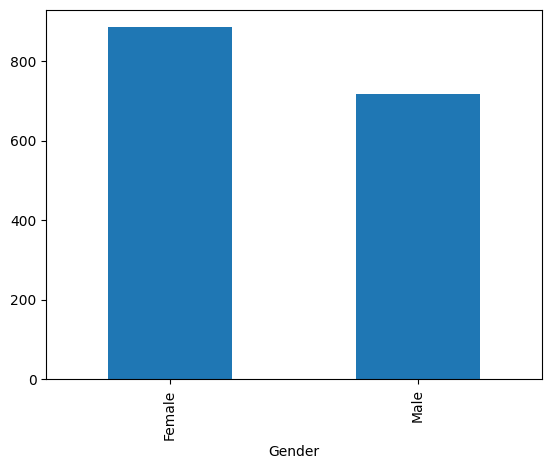

In [34]:
gl.plot(kind = "bar", stacked = False)

In [35]:
gl=df.groupby(["Gender", "EverBenched"]).size()

In [36]:
gl

Gender  EverBenched
Female  No             1696
        Yes             179
Male    No             2479
        Yes             299
dtype: int64

In [37]:
gl=df.groupby(["Gender", "EverBenched"]).size().unstack()

In [38]:
gl

EverBenched,No,Yes
Gender,,
Female,1696,179
Male,2479,299


<Axes: xlabel='Gender'>

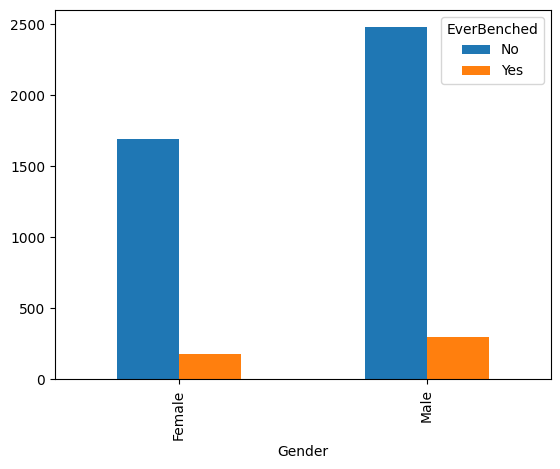

In [39]:
gl.plot(kind = "bar", stacked = False)

In [40]:
#Machine Learning Classification model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,f1_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
pip install PyLMNN

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PyLMNN (from versions: none)
ERROR: No matching distribution found for PyLMNN


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

In [43]:
#Covert the categorical column into numerical column using label encoder

In [44]:
obj = df[["Education", "City", "Gender", "EverBenched"]]

In [45]:
obj

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes
...,...,...,...,...
4648,Bachelors,Bangalore,Female,No
4649,Masters,Pune,Male,No
4650,Masters,New Delhi,Male,No
4651,Bachelors,Bangalore,Male,Yes


In [46]:
for obj in df.select_dtypes(include = "object"):
    label = LabelEncoder()
    label.fit(df[obj])
    df[obj]=label.transform(df[obj])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [47]:
#education
# 0 --> Bachelors
# 1 --> Masters
# 2 --> phd

In [48]:
# city
#o-->bangalore
# 1--> pune
# 2 --> delhi

In [49]:
#gender 
#0 --> male
#1 --> female

In [50]:
#EverBenched
# 0 --> no
# 1 --> yes

In [51]:
#split the data
x = df.drop(columns ="LeaveOrNot")
x

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4
4649,1,2013,2,2,37,1,0,2
4650,1,2018,1,3,27,1,0,5
4651,0,2012,0,3,30,1,1,2


In [52]:
x.shape

(4653, 8)

In [53]:
y = df["LeaveOrNot"]

In [54]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [56]:
#logistic Regression

In [57]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

In [58]:
log_acc = accuracy_score(y_test, log_pred)
print("accuracy is:",log_acc)

accuracy is: 0.7285223367697594


In [59]:
preci = precision_score(y_test, log_pred)
print("precison is: ", preci)

precison is:  0.6780487804878049


In [60]:
reca = recall_score(y_test, log_pred)
print("recall is", reca)

recall is 0.35732647814910024


In [61]:
f1 = f1_score(y_test, log_pred)
print("f1 score", f1)

f1 score 0.468013468013468


In [62]:
cls_report = classification_report(y_test, log_pred)
print("classification_report is", cls_report)

classification_report is               precision    recall  f1-score   support

           0       0.74      0.91      0.82       775
           1       0.68      0.36      0.47       389

    accuracy                           0.73      1164
   macro avg       0.71      0.64      0.64      1164
weighted avg       0.72      0.73      0.70      1164



In [63]:
con_matrix = confusion_matrix(y_test, log_pred)
print("confusion matrix", con_matrix)

confusion matrix [[709  66]
 [250 139]]


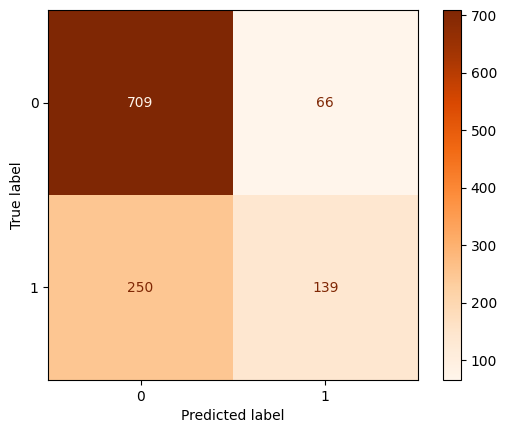

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,log_pred,cmap="Oranges")

In [64]:
#random forest classificatio

In [65]:
ran_model = RandomForestClassifier()
ran_model.fit(x_train, y_train)
ran_pred = ran_model.predict(x_test)

In [69]:
ran_acc = accuracy_score(y_test, ran_pred)
print("accuracy is:",ran_acc)

accuracy is: 0.8530927835051546


In [70]:
ran_preci = precision_score(y_test, ran_pred)
print("precison is: ", ran_preci)

precison is:  0.8244047619047619


In [71]:
ran_reca = recall_score(y_test, ran_pred)
print("recall is", ran_reca)

recall is 0.712082262210797


In [72]:
ran_f1 = f1_score(y_test, ran_pred)
print("f1 score", ran_f1)

f1 score 0.7641379310344828


In [73]:
rancls_report = classification_report(y_test, ran_pred)
print("classification_report is", rancls_report)

classification_report is               precision    recall  f1-score   support

           0       0.86      0.92      0.89       775
           1       0.82      0.71      0.76       389

    accuracy                           0.85      1164
   macro avg       0.84      0.82      0.83      1164
weighted avg       0.85      0.85      0.85      1164



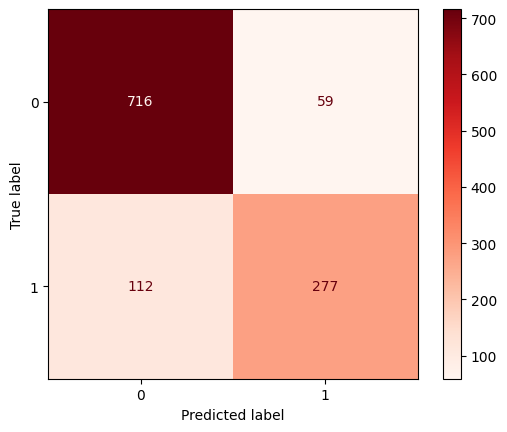

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test,ran_pred,cmap="Reds")

In [74]:
#Decision Tree Classifier

In [75]:
dec_model = DecisionTreeClassifier()
dec_model.fit(x_train, y_train)
dec_pred = dec_model.predict(x_test)

In [76]:
dec_acc = accuracy_score(y_test, dec_pred)
print("accuracy is:",dec_acc)

accuracy is: 0.834192439862543


In [77]:
dec_preci = precision_score(y_test, dec_pred)
print("precison is: ", dec_preci)

precison is:  0.7692307692307693


In [78]:
dec_reca = recall_score(y_test, dec_pred)
print("recall is", dec_reca)

recall is 0.7197943444730077


In [79]:
dec_f1 = f1_score(y_test, dec_pred)
print("f1 score", dec_f1)

f1 score 0.7436918990703852


In [80]:
deccls_report = classification_report(y_test, dec_pred)
print("classification_report is", deccls_report)

classification_report is               precision    recall  f1-score   support

           0       0.86      0.89      0.88       775
           1       0.77      0.72      0.74       389

    accuracy                           0.83      1164
   macro avg       0.82      0.81      0.81      1164
weighted avg       0.83      0.83      0.83      1164



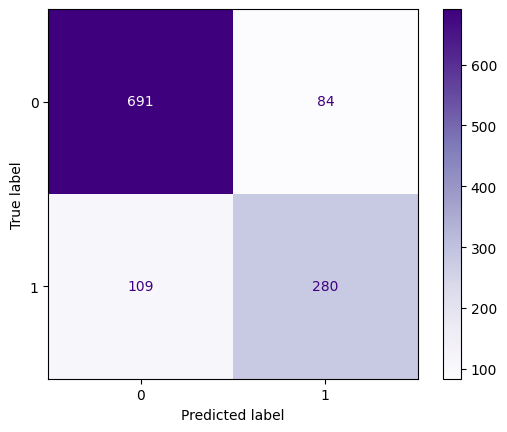

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred,cmap="Purples")

In [81]:
#KNeighborsClassifier

In [82]:
k_model = KNeighborsClassifier()
k_model.fit(x_train, y_train)
k_pred = k_model.predict(x_test)

In [83]:
k_acc = accuracy_score(y_test, k_pred)
print("accuracy is:",k_acc)

accuracy is: 0.8058419243986255


In [84]:
k_preci = precision_score(y_test, k_pred)
print("precison is: ", k_preci)

precison is:  0.7725752508361204


In [85]:
k_reca = recall_score(y_test, k_pred)
print("recall is", k_reca)

recall is 0.5938303341902313


In [86]:
k_f1 = f1_score(y_test, k_pred)
print("f1 score", k_f1)

f1 score 0.6715116279069768


In [87]:
k_report = classification_report(y_test, k_pred)
print("classification_report is", k_report)

classification_report is               precision    recall  f1-score   support

           0       0.82      0.91      0.86       775
           1       0.77      0.59      0.67       389

    accuracy                           0.81      1164
   macro avg       0.79      0.75      0.77      1164
weighted avg       0.80      0.81      0.80      1164



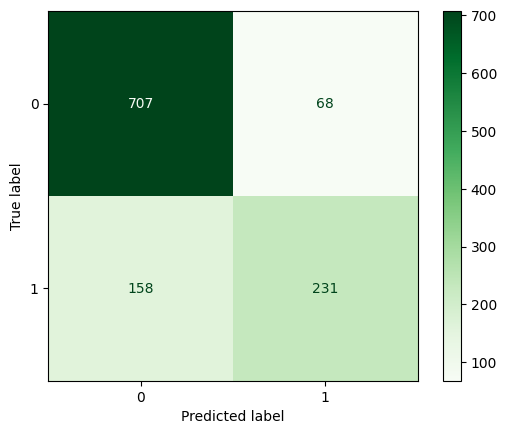

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test,k_pred,cmap="Greens")